Importing

In [1]:
# 📦 Step 0: Importing required libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models (for later)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


Load the dataset

In [12]:
# 📂 Step 1: Load the dataset

# Load the cleaned EHR dataset
df = pd.read_csv('cleaned_ehr_dataset_only_valid_rows.csv')

# Preview the shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (500, 51)


,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,occupation,...,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV,treat_date,treat_treatment,treat_outcome,social_smoking,social_alcohol_consumption,social_exercise_habits,side_effects_text
0,P00001,Sophia Martinez,44.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Teacher,...,34.5,65.0,83.1,['2024-09-09'],['Chemotherapy'],['progressive disease'],Current smoker,Regular,Active,Infections
1,P00002,Sophia Martinez,20.0,Male,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,No,Retired,...,39.4,50.0,92.0,['2024-09-01'],['Radiation Therapy'],['under palliative care'],Never smoked,NaN,Active,"Fatigue, Infections"
2,P00003,James Wilson,53.0,Female,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,No,Doctor,...,41.2,63.2,80.5,['2024-09-02'],['Chemotherapy'],['stable disease'],Current smoker,NaN,Moderate,"Hair Loss, Nausea"
3,P00004,David Lee,41.0,Male,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,Yes,Teacher,...,48.3,45.9,90.8,['2024-09-14'],['Targeted Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Hair Loss, Nausea"
4,P00005,Emma Johnson,82.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Engineer,...,46.1,73.5,88.4,['2024-10-04'],['Radiation Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Fatigue, Infections"


Check the data types and non-null counts

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  500 non-null    object 
 1   name                        500 non-null    object 
 2   age                         500 non-null    float64
 3   gender                      500 non-null    object 
 4   diagnosis                   500 non-null    object 
 5   doctor_notes                500 non-null    object 
 6   ethnicity                   500 non-null    object 
 7   blood_type                  500 non-null    object 
 8   family_history_cancer       500 non-null    object 
 9   occupation                  500 non-null    object 
 10  previous_cancer             500 non-null    object 
 11  symptoms                    500 non-null    object 
 12  duration_of_symptoms        500 non-null    float64
 13  first_consultation          500 non

In [14]:
df.describe()

,age,duration_of_symptoms,blast_cells,time_to_relapse,cancer_year,lab_WBC,lab_RBC,lab_Hemoglobin,lab_Hematocrit,lab_Platelets,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV
count,500.000000,500.000000,500.000000,255.000000,246.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,52.486000,12.888000,25.312200,17.203922,2005.223577,11.503800,4.729800,13.020400,42.899800,302.698000,29.875000,60.032200,89.853800
std,18.124204,6.803236,14.398445,10.109128,8.724982,4.923141,0.741344,2.898563,7.094022,114.456504,11.251435,11.612367,5.874094
min,20.000000,1.000000,0.100000,1.000000,1990.000000,3.000000,3.500000,8.000000,30.000000,100.000000,10.100000,40.000000,80.100000
25%,37.000000,7.000000,13.100000,8.000000,1997.000000,7.175000,4.100000,10.400000,36.775000,203.750000,19.600000,49.775000,84.800000
50%,53.000000,13.000000,25.350000,17.000000,2006.000000,11.500000,4.700000,13.100000,43.500000,306.000000,30.350000,60.800000,89.850000
75%,68.000000,19.000000,37.800000,25.000000,2012.000000,15.700000,5.400000,15.525000,48.700000,407.250000,39.100000,69.950000,95.100000
max,84.000000,24.000000,50.000000,36.000000,2020.000000,19.900000,6.000000,18.000000,55.000000,500.000000,49.800000,79.800000,100.000000


In [15]:
df.head()

,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,occupation,...,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV,treat_date,treat_treatment,treat_outcome,social_smoking,social_alcohol_consumption,social_exercise_habits,side_effects_text
0,P00001,Sophia Martinez,44.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Teacher,...,34.5,65.0,83.1,['2024-09-09'],['Chemotherapy'],['progressive disease'],Current smoker,Regular,Active,Infections
1,P00002,Sophia Martinez,20.0,Male,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,No,Retired,...,39.4,50.0,92.0,['2024-09-01'],['Radiation Therapy'],['under palliative care'],Never smoked,NaN,Active,"Fatigue, Infections"
2,P00003,James Wilson,53.0,Female,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,No,Doctor,...,41.2,63.2,80.5,['2024-09-02'],['Chemotherapy'],['stable disease'],Current smoker,NaN,Moderate,"Hair Loss, Nausea"
3,P00004,David Lee,41.0,Male,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,Yes,Teacher,...,48.3,45.9,90.8,['2024-09-14'],['Targeted Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Hair Loss, Nausea"
4,P00005,Emma Johnson,82.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Engineer,...,46.1,73.5,88.4,['2024-10-04'],['Radiation Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Fatigue, Infections"


In [16]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'ethnicity', 'blood_type', 'family_history_cancer', 'occupation',
       'previous_cancer', 'symptoms', 'duration_of_symptoms',
       'first_consultation', 'blast_cells', 'cell_morphology',
       'philadelphia_chromosome', 'FLT3_mutation', 'TP53_mutation',
       'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'response_to_treatment', 'relapse',
       'time_to_relapse', 'survival_status', 'last_follow_up', 'cancer_type',
       'cancer_year', 'med_name', 'med_dosage', 'med_frequency', 'lab_WBC',
       'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets',
       'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV', 'treat_date',
       'treat_treatment', 'treat_outcome', 'social_smoking',
       'social_alcohol_consumption', 'social_exercise_habits',
       'side_effects_text'],
      dtype='ob

Extraction of the Dark Data from doctor notes

In [17]:
# 📦 Entity extraction setup
import scispacy
import en_ner_bc5cdr_md
import pandas as pd
from tqdm import tqdm

# Load SciSpacy biomedical model
nlp = en_ner_bc5cdr_md.load()

# Entity extraction function
def extract_entities(text):
    if pd.isnull(text) or str(text).strip() == "":
        return []
    doc = nlp(str(text).strip())
    return [ent.text.lower() for ent in doc.ents]

# Apply with progress bar
tqdm.pandas()

# Extract entities from relevant columns
df['doctor_notes_entities'] = df['doctor_notes'].progress_apply(extract_entities)
df['symptoms_entities'] = df['symptoms'].progress_apply(extract_entities)
df['side_effects_entities'] = df['side_effects_text'].progress_apply(extract_entities)


100%|██████████| 500/500 [00:01<00:00, 319.70it/s]


In [18]:
df['doctor_notes_entities'].head(), df['symptoms_entities'].head(), df['side_effects_entities'].head()

(0                               [lymphocytic leukemia]
 1       [myeloid leukemia, aml, myeloid leukemia, cml]
 2                [hodgkin's lymphoma, neoplasms (mpns]
 3                             [non-hodgkin's lymphoma]
 4    [lymphocytic leukemia, acute lymphoblastic leu...
 Name: doctor_notes_entities, dtype: object,
 0    [fatigue, fever']]
 1                [pain]
 2           [['fever']]
 3       [pain, fever']]
 4       [pain, fever']]
 Name: symptoms_entities, dtype: object,
 0                       []
 1    [fatigue, infections]
 2      [hair loss, nausea]
 3      [hair loss, nausea]
 4    [fatigue, infections]
 Name: side_effects_entities, dtype: object)

Categorical Columns -- Preprocessing

In [20]:
# Encode binary (Yes/No) columns

# Define columns to encode
binary_cols = [
    'family_history_cancer',
    'previous_cancer',
    'philadelphia_chromosome',
    'FLT3_mutation',
    'TP53_mutation',
    'chemotherapy',
    'radiation_therapy',
    'bone_marrow_transplant',
    'immunotherapy',
    'targeted_therapy',
    'relapse'
]

# Convert all 'Yes'/'No' to 1/0
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


In [22]:
df[binary_cols].head()  # Check the first few rows of the encoded columns

,family_history_cancer,previous_cancer,philadelphia_chromosome,FLT3_mutation,TP53_mutation,chemotherapy,radiation_therapy,bone_marrow_transplant,immunotherapy,targeted_therapy,relapse
0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,1,1
2,0,1,1,1,1,0,0,0,0,0,1
3,1,1,0,1,0,0,1,0,0,1,1
4,1,0,0,0,0,1,1,0,1,1,1


In [55]:
le = LabelEncoder()
df['survival_status_encoded'] = le.fit_transform(df['survival_status'])

In [23]:
L_encoder = LabelEncoder()

# Fit and transform
df['gender'] = L_encoder.fit_transform(df['gender'])

In [24]:
df['gender'].value_counts()

gender
1    276
0    224
Name: count, dtype: int64

In [ ]:

le = LabelEncoder()
df['cell_morphology_encoded'] = le.fit_transform(df['cell_morphology'])

In [26]:
df['occupation'].value_counts()

occupation
Salesperson    81
Manager        73
Doctor         69
Teacher        62
Engineer       58
Student        55
Nurse          53
Retired        49
Name: count, dtype: int64

One-Hot_Encoding

In [27]:
#One-hot encode 'occupation' with top N categories
# One-hot encode the cleaned column
df = pd.get_dummies(df, columns=['occupation'], prefix='occ')


In [28]:
df.head()  # Check the first few rows of the one-hot encoded DataFrame

,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,previous_cancer,...,symptoms_entities,side_effects_entities,occ_Doctor,occ_Engineer,occ_Manager,occ_Nurse,occ_Retired,occ_Salesperson,occ_Student,occ_Teacher
0,P00001,Sophia Martinez,44.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,1,0,...,"[fatigue, fever']]",[],False,False,False,False,False,False,False,True
1,P00002,Sophia Martinez,20.0,1,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,0,0,...,[pain],"[fatigue, infections]",False,False,False,False,True,False,False,False
2,P00003,James Wilson,53.0,0,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,0,1,...,[['fever']],"[hair loss, nausea]",True,False,False,False,False,False,False,False
3,P00004,David Lee,41.0,1,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,1,1,...,"[pain, fever']]","[hair loss, nausea]",False,False,False,False,False,False,False,True
4,P00005,Emma Johnson,82.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,1,0,...,"[pain, fever']]","[fatigue, infections]",False,True,False,False,False,False,False,False


In [29]:
df[['ethnicity',
    'blood_type',
    'cancer_type',
    'response_to_treatment',
    'social_smoking',
    'social_alcohol_consumption',
    'social_exercise_habits']].isna().sum()

ethnicity                       0
blood_type                      0
cancer_type                   254
response_to_treatment           0
social_smoking                  0
social_alcohol_consumption    158
social_exercise_habits          0
dtype: int64

In [30]:
# Drop 'cancer_type' due to high missingness
df.drop(columns=['cancer_type'], inplace=True)

# Fill missing values in 'social_alcohol_consumption' with 'Unknown'
df['social_alcohol_consumption'] = df['social_alcohol_consumption'].fillna('Unknown')


In [ ]:
# Step X: One-hot encode other nominal categorical columns
one_hot_cols = [
    'ethnicity',
    'blood_type',
    'response_to_treatment',
    'social_smoking',
    'social_alcohol_consumption',
    'social_exercise_habits'
]

# Perform one-hot encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)# to avoid multicollinearity


In [54]:
df.columns  # Check the columns after one-hot encoding

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'family_history_cancer', 'previous_cancer', 'symptoms',
       'duration_of_symptoms', 'first_consultation', 'blast_cells',
       'cell_morphology', 'philadelphia_chromosome', 'FLT3_mutation',
       'TP53_mutation', 'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'relapse', 'survival_status', 'last_follow_up',
       'med_name', 'med_dosage', 'med_frequency', 'lab_WBC', 'lab_RBC',
       'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets', 'lab_Lymphocyte %',
       'lab_Neutrophil %', 'lab_MCV', 'treat_date', 'treat_treatment',
       'treat_outcome', 'side_effects_text', 'doctor_notes_entities',
       'symptoms_entities', 'side_effects_entities', 'occ_Doctor',
       'occ_Engineer', 'occ_Manager', 'occ_Nurse', 'occ_Retired',
       'occ_Salesperson', 'occ_Student', 'occ_Teacher', 'ethnicity_Asian',


In [35]:
df.head()

,patient_id,name,age,gender,diagnosis,doctor_notes,family_history_cancer,previous_cancer,symptoms,duration_of_symptoms,...,blood_type_O+,blood_type_O-,response_to_treatment_No Response,response_to_treatment_Partial Remission,social_smoking_Former smoker,social_smoking_Never smoked,social_alcohol_consumption_Regular,social_alcohol_consumption_Unknown,social_exercise_habits_Moderate,social_exercise_habits_Sedentary
0,P00001,Sophia Martinez,44.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,1,0,"['Weight Loss', 'Fatigue', 'Fever']",19.0,...,False,False,False,True,False,False,True,False,False,False
1,P00002,Sophia Martinez,20.0,1,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",0,0,['Bone Pain'],22.0,...,False,False,True,False,False,True,False,True,False,False
2,P00003,James Wilson,53.0,0,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",0,1,['Fever'],17.0,...,False,False,True,False,False,False,False,True,True,False
3,P00004,David Lee,41.0,1,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,1,1,"['Fatigue', 'Bone Pain', 'Fever']",8.0,...,False,False,False,False,True,False,True,False,False,True
4,P00005,Emma Johnson,82.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,1,0,"['Bone Pain', 'Weight Loss', 'Fever']",24.0,...,False,False,False,True,True,False,True,False,False,True


In [33]:
len(df.columns)

73

In [37]:
df['time_to_relapse'].isna().sum()

245

In [38]:
df['cancer_year'].isna().sum()

254

In [43]:
df.drop(columns=['time_to_relapse'], inplace=True)

In [42]:
df.drop(columns=['cancer_year'], inplace=True)

Preprocess the Numerical columns

In [45]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
num_cols = [
    'age', 'duration_of_symptoms', 'blast_cells',
    'lab_WBC', 'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets',
    'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV'
]

# Fill missing values if any (you can also drop rows/columns if preferred)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Initialize and apply scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [47]:
df[num_cols].head()  # Check for any remaining missing values

,age,duration_of_symptoms,blast_cells,lab_WBC,lab_RBC,lab_Hemoglobin,lab_Hematocrit,lab_Platelets,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV
0,-0.468683,0.899296,0.277238,0.365214,-0.310288,0.994453,0.254017,0.920939,0.411470,0.428231,-1.150912
1,-1.794205,1.340704,-1.328709,0.649870,1.310015,1.098056,-0.691386,0.536129,0.847407,-0.864789,0.365733
2,0.028388,0.605024,0.325903,-1.627379,1.310015,1.616072,0.818437,-0.023596,1.007546,0.273069,-1.593977
3,-0.634373,-0.719201,0.743032,-0.041438,-0.580338,-1.146680,-0.903043,-0.154781,1.639209,-1.218214,0.161241
4,1.630061,1.634976,-0.369312,-0.346426,0.769914,0.890850,-1.777894,0.308740,1.443483,1.160942,-0.247741


In [56]:
import re

def extract_text(text):
    match = re.search(r"'(.*?)'", str(text))
    if match:
        return match.group(1)
    else:
        return None

# Columns that are list-like strings
list_columns = [
    'treat_date', 'treat_treatment', 'treat_outcome',
    'med_name', 'med_dosage', 'med_frequency'
]

# Apply to each
for col in list_columns:
    df[col] = df[col].apply(extract_text)


In [58]:
df[list_columns].head()

,treat_date,treat_treatment,treat_outcome,med_name,med_dosage,med_frequency
0,2024-09-09,Chemotherapy,progressive disease,Ibrutinib,420mg,Once/day
1,2024-09-01,Radiation Therapy,under palliative care,Daunorubicin,45mg,Once/day
2,2024-09-02,Chemotherapy,stable disease,Cytarabine,100mg,Once/day
3,2024-09-14,Targeted Therapy,progressive disease,Daunorubicin,45mg,Once/day
4,2024-10-04,Radiation Therapy,progressive disease,Cytarabine,100mg,Once/day


Handling Date Time

In [61]:
# Convert both columns safely
df['treat_date'] = pd.to_datetime(df['treat_date'], errors='coerce')
df['first_consultation'] = pd.to_datetime(df['first_consultation'], errors='coerce')

# Now calculate the difference
df['days_to_treatment'] = (df['treat_date'] - df['first_consultation']).dt.days


In [64]:
df['last_follow_up'] = pd.to_datetime(df['last_follow_up'], errors='coerce')
df['follow_up_duration'] = (df['last_follow_up'] - df['treat_date']).dt.days


Dark data Columns Extracted

In [67]:
dc=['doctor_notes_entities','symptoms_entities','side_effects_entities']
df[dc].head()

,doctor_notes_entities,symptoms_entities,side_effects_entities
0,[lymphocytic leukemia],"[fatigue, fever']]",[]
1,"[myeloid leukemia, aml, myeloid leukemia, cml]",[pain],"[fatigue, infections]"
2,"[hodgkin's lymphoma, neoplasms (mpns]",[['fever']],"[hair loss, nausea]"
3,[non-hodgkin's lymphoma],"[pain, fever']]","[hair loss, nausea]"
4,"[lymphocytic leukemia, acute lymphoblastic leu...","[pain, fever']]","[fatigue, infections]"


In [68]:
df_backup = df.copy()

In [82]:
len(df_backup.columns)

75

In [80]:
df=df_backup.copy()

In [84]:
# Convert all boolean columns to integers (True → 1, False → 0)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


In [88]:
selected_features = [
    'age',
    'gender',  # Encoded as 0/1
    'family_history_cancer',
    'previous_cancer',
    'philadelphia_chromosome',
    'FLT3_mutation',
    'TP53_mutation',
    'chemotherapy',
    'radiation_therapy',
    'bone_marrow_transplant',
    'immunotherapy',
    'targeted_therapy',
    'relapse',
    'cell_morphology_encoded',
    'survival_status_encoded',
    'lab_WBC', 'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit',
    'lab_Platelets', 'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV',
    'days_to_treatment', 'follow_up_duration'
]


In [86]:
one_hot_features = [col for col in df.columns if col.startswith(('ethnicity_', 'blood_type_', 'occ_', 'social_', 'response_to_treatment_'))]

In [89]:
features = selected_features + one_hot_features

In [91]:
len(features)

52

In [106]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'family_history_cancer', 'previous_cancer', 'symptoms',
       'duration_of_symptoms', 'first_consultation', 'blast_cells',
       'cell_morphology', 'philadelphia_chromosome', 'FLT3_mutation',
       'TP53_mutation', 'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'relapse', 'survival_status', 'last_follow_up',
       'med_name', 'med_dosage', 'med_frequency', 'lab_WBC', 'lab_RBC',
       'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets', 'lab_Lymphocyte %',
       'lab_Neutrophil %', 'lab_MCV', 'treat_date', 'treat_treatment',
       'treat_outcome', 'side_effects_text', 'doctor_notes_entities',
       'symptoms_entities', 'side_effects_entities', 'occ_Doctor',
       'occ_Engineer', 'occ_Manager', 'occ_Nurse', 'occ_Retired',
       'occ_Salesperson', 'occ_Student', 'occ_Teacher', 'ethnicity_Asian',


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['treat_outcome_encoded'] = le.fit_transform(df['treat_outcome'])

In [108]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['treat_outcome_encoded']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.53      0.78      0.63        23
           2       0.45      0.26      0.33        19
           3       0.38      0.33      0.35        18
           4       0.45      0.47      0.46        19

    accuracy                           0.47       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.47      0.45       100



In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Performance:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.91      0.89        23
           2       0.76      0.84      0.80        19
           3       0.68      0.83      0.75        18
           4       0.93      0.74      0.82        19

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



In [112]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.68      0.74      0.71        23
           2       0.65      0.68      0.67        19
           3       0.62      0.72      0.67        18
           4       0.86      0.63      0.73        19

    accuracy                           0.68       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



In [113]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.81      0.91      0.86        23
           2       0.62      0.68      0.65        19
           3       0.70      0.78      0.74        18
           4       0.73      0.58      0.65        19

    accuracy                           0.72       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.72      0.72       100



In [114]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [115]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm)
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print("Voting Classifier (Hard) Performance:")
print(classification_report(y_test, y_pred_vote))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [116]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)

print("Stacking Classifier Performance:")
print(classification_report(y_test, y_pred_stack))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [118]:
models = {
    'RandomForest': rf,
    'Bagging': bagging,
    'GradientBoosting': gb,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Voting': voting_clf,
    'Stacking': stacking
}

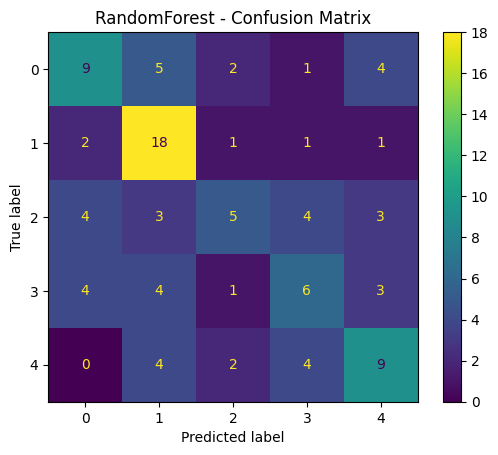

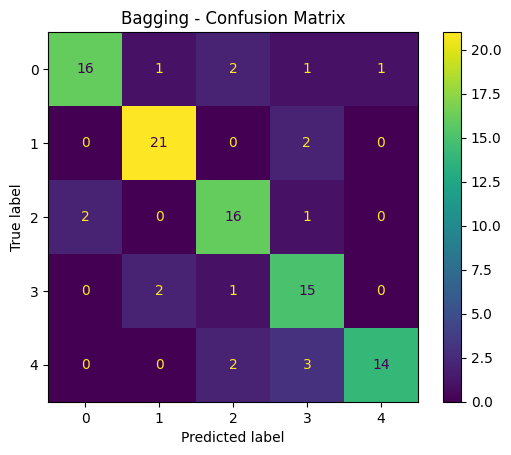

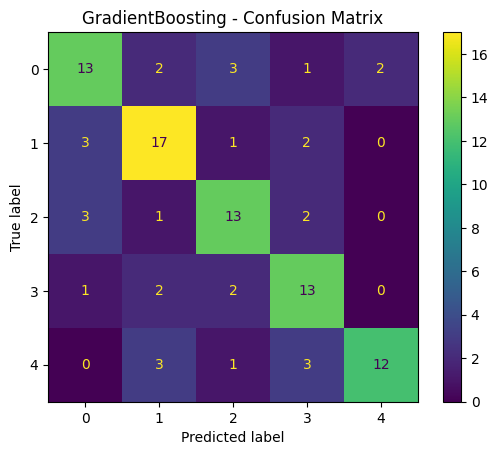

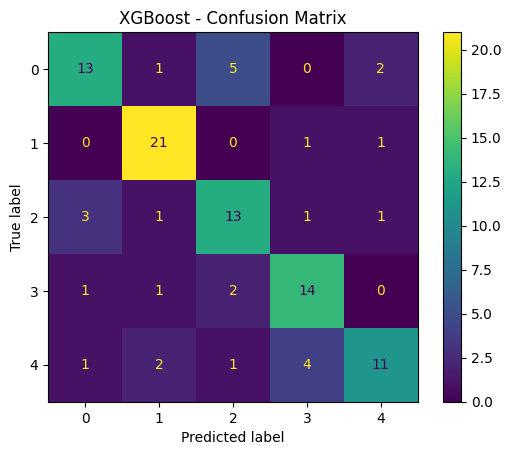

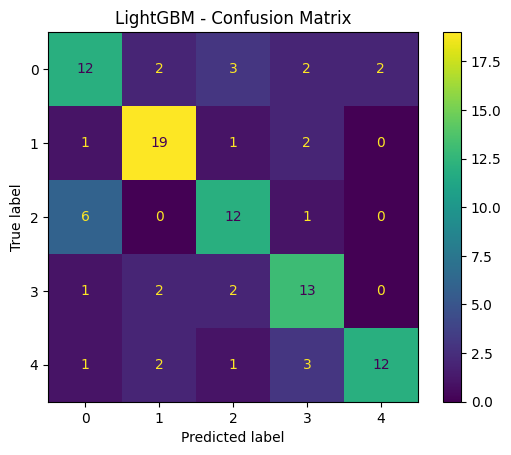

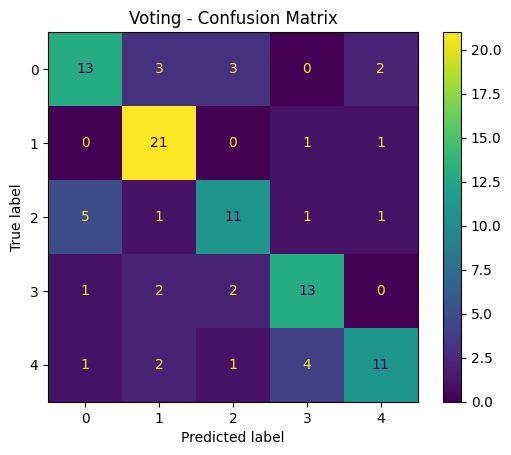

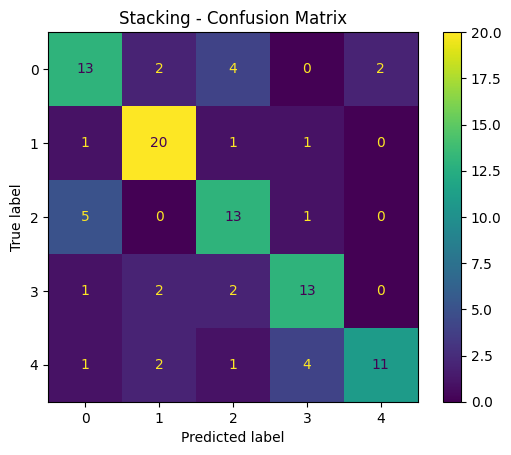

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_conf_matrix(model, X_test, y_test, f"{name} - Confusion Matrix")


In [120]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("\n")


--- RandomForest ---
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.53      0.78      0.63        23
           2       0.45      0.26      0.33        19
           3       0.38      0.33      0.35        18
           4       0.45      0.47      0.46        19

    accuracy                           0.47       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.47      0.45       100



--- Bagging ---
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.91      0.89        23
           2       0.76      0.84      0.80        19
           3       0.68      0.83      0.75        18
           4       0.93      0.74      0.82        19

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82     